In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('red-wine.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
max_ = data.max(axis=0)
min_ = data.min(axis=0)
data = (data - min_) /  (max_ - min_)

y = data.quality
X = data.drop(["quality"], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [10]:
#scale to [0, 1]

y


0       0.4
1       0.4
2       0.4
3       0.6
4       0.4
       ... 
1594    0.4
1595    0.6
1596    0.6
1597    0.4
1598    0.6
Name: quality, Length: 1599, dtype: float64

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=[11]),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=1)
])

model.compile(
    optimizer="adam",
    loss="mae"
)

In [16]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=256,
    epochs=10
)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.3452 - val_loss: 0.1326
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1466 - val_loss: 0.1203
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1314 - val_loss: 0.1221
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1234 - val_loss: 0.1047
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1155 - val_loss: 0.1135
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1106 - val_loss: 0.1008
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1078 - val_loss: 0.1022
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1043 - val_loss: 0.0985
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1006 - val_loss: 0.0997


<Axes: >

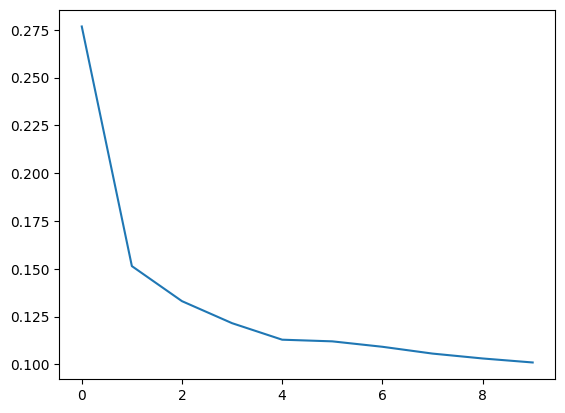

In [18]:
history_df = pd.DataFrame(history.history)
history_df["loss"].plot()